## Informações dos Dados

5 Sets de A até E:


*   A: Pacientes saudáveis com olhos abertos
*   B: Pacientes saudáveis com olhos fechados
*   C: Período livre de convulsão fora da zona onset
*   D: Período livre de convulsão dentro da zona onset
*   E: Convulsão

Cada Set contém 100 segmentos de 23.6s cada em 173.61Hz



In [61]:
#Bibliotecas essenciais
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Bibliotecas auxiliares
import os
import random
from tqdm import tqdm

# Criar um teste de validação
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/EEG_BonnDataset/'

In [2]:
Sets_Paths = ['Set_A/', 'Set_B/', 'Set_C/','Set_D/', 'Set_E/',]

def create_set_dataframe(Set_Path, Set_Files_List):
  DataFrame = pd.read_csv(Set_Path + Set_Files_List[0], names=Set_Files_List)

  for i in range(1, len(Set_Files_List)):
    with open(Set_Path + Set_Files_List[i]) as file:
      column = []
      for line in file:
        column.append(int(line.rstrip()))

    DataFrame[Set_Files_List[i]] = column

  return DataFrame

In [3]:
Set_Path = path + Sets_Paths[0]
Set_A_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[1]
Set_B_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[2]
Set_C_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[3]
Set_D_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))

Set_Path = path + Sets_Paths[4]
Set_E_DataFrame = create_set_dataframe(Set_Path, os.listdir(Set_Path))


In [4]:
def create_time_seizure_column(frequency, start_time, dataframe, seizure):
  time_list = []
  time = frequency**-1

  for i in range(0, 4097):
    rounded_time = round(start_time , 4)
    time_list.append(rounded_time)
    start_time = start_time + time
  
  dataframe['time'] = time_list

  if seizure==0:
    dataframe['seizure'] = 'healthy'
  if seizure==1:
    dataframe['seizure'] = 'unhealthy'
  if seizure==2:
    dataframe['seizure'] = 'seizure'

    

In [24]:
create_time_seizure_column(173.61, 0.00, Set_A_DataFrame,0)
create_time_seizure_column(173.61, 0.00, Set_B_DataFrame,0)
create_time_seizure_column(173.61, 0.00, Set_C_DataFrame,1)
create_time_seizure_column(173.61, 0.00, Set_D_DataFrame,1)
create_time_seizure_column(173.61, 0.00, Set_E_DataFrame,2)


print(Set_A_DataFrame.loc[[3799]])
Set_A_DataFrame.head()

      Z001.txt  Z002.txt  Z003.txt  ...  Z100.txt     time  seizure
3799        15       -94       -23  ...        -5  21.8824  healthy

[1 rows x 102 columns]


,Z001.txt,Z002.txt,Z003.txt,Z004.txt,Z005.txt,Z006.txt,Z007.txt,Z008.txt,Z009.txt,Z010.txt,Z011.txt,Z012.txt,Z013.txt,Z014.txt,Z015.txt,Z016.txt,Z017.txt,Z018.txt,Z019.txt,Z020.txt,Z021.txt,Z022.txt,Z023.txt,Z024.txt,Z025.txt,Z026.txt,Z027.txt,Z028.txt,Z029.txt,Z030.txt,Z031.txt,Z032.txt,Z033.txt,Z034.txt,Z035.txt,Z036.txt,Z037.txt,Z038.txt,Z039.txt,Z040.txt,...,Z063.txt,Z064.txt,Z065.txt,Z066.txt,Z067.txt,Z068.txt,Z069.txt,Z070.txt,Z071.txt,Z072.txt,Z073.txt,Z074.txt,Z075.txt,Z076.txt,Z077.txt,Z078.txt,Z079.txt,Z080.txt,Z081.txt,Z082.txt,Z083.txt,Z084.txt,Z085.txt,Z086.txt,Z087.txt,Z088.txt,Z089.txt,Z090.txt,Z091.txt,Z092.txt,Z093.txt,Z094.txt,Z095.txt,Z096.txt,Z097.txt,Z098.txt,Z099.txt,Z100.txt,time,seizure
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,14,-64,10,31,30,34,-62,-18,0,-20,-58,6,-40,-1,28,67,19,-4,-42,96,-21,-41,-26,-10,-19,40,-49,-73,18,63,...,-40,-20,-9,-15,-49,20,-25,-13,13,113,-17,-48,24,39,57,-8,69,-34,36,20,-56,-20,-44,-21,-2,-1,16,-30,13,40,-19,-45,6,-133,-3,-51,56,-36,0.0000,healthy
1,22,-50,-22,-43,26,-89,20,-16,17,-38,25,-72,-6,25,19,34,-55,-9,2,-3,-59,-14,-13,-40,30,86,14,4,-49,43,-29,-37,-29,-9,-39,60,-48,-66,34,43,...,-33,-43,15,-23,-59,21,7,-4,21,129,-36,-52,10,41,82,-19,69,-21,27,27,-55,-14,-63,-14,-8,-11,24,-34,30,48,-1,-62,-6,-144,-3,-42,55,-71,0.0058,healthy
2,35,-64,-17,-39,32,-73,42,10,29,-31,31,-52,-14,17,-3,31,-44,9,-1,2,-60,-33,43,-56,8,89,23,10,-37,71,-34,-29,-39,-33,-41,74,-46,-59,45,47,...,-16,-47,35,-25,-56,19,37,2,39,108,-52,-63,-9,43,93,-32,65,-17,24,-5,-53,-12,-85,-12,-27,-11,33,-33,42,35,33,-76,-8,-113,-12,-39,38,-120,0.0115,healthy
3,45,-91,-24,-39,25,-69,48,28,46,-25,36,-24,-14,7,-14,4,-42,33,14,16,-52,-43,69,-10,-9,65,30,15,-12,87,-34,-37,-30,-24,-16,70,-32,-58,37,53,...,15,-37,37,-23,-56,12,40,21,46,60,-66,-55,-18,36,68,-40,59,-27,12,-32,-58,-22,-73,-26,-43,-21,23,5,56,5,51,-98,-6,-74,-24,-47,-5,-150,0.0173,healthy
4,69,-135,-31,-9,16,-51,27,31,50,-32,33,4,-9,4,-12,-15,-33,52,36,29,-47,-40,55,33,-2,19,46,15,0,108,-44,-32,-1,-61,5,67,-34,-53,35,70,...,39,-28,19,-18,-43,13,26,25,48,3,-62,-41,-9,24,23,-55,43,-48,6,-38,-73,-36,-72,-60,-39,-32,9,31,56,-40,49,-108,15,-41,-34,-51,-47,-160,0.0230,healthy


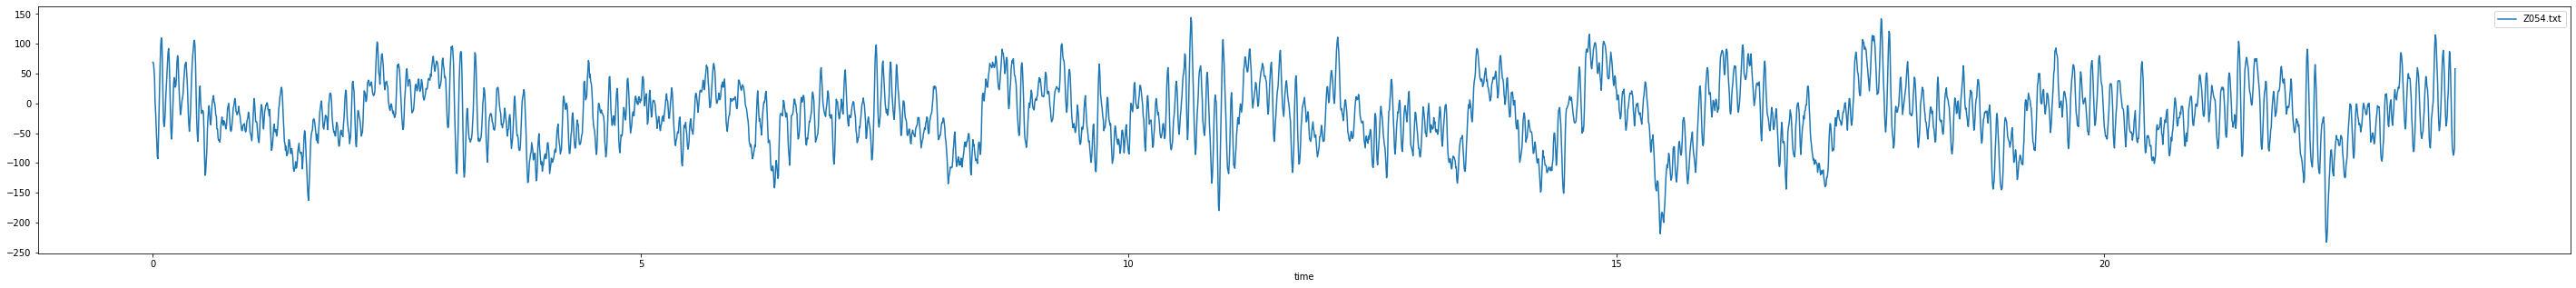

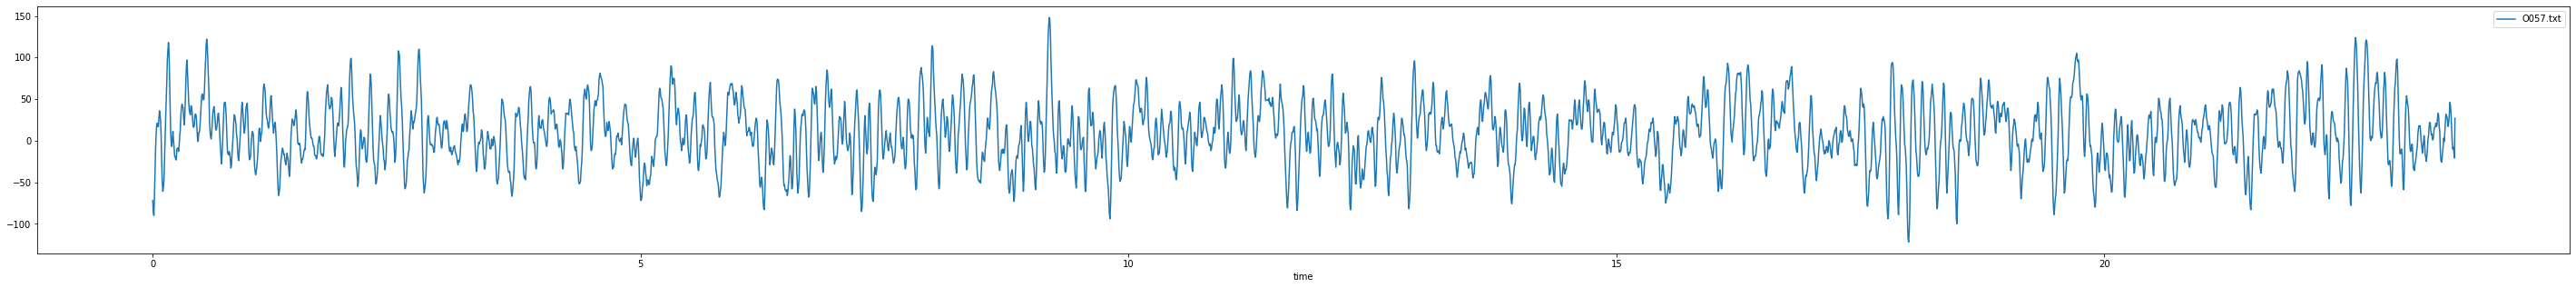

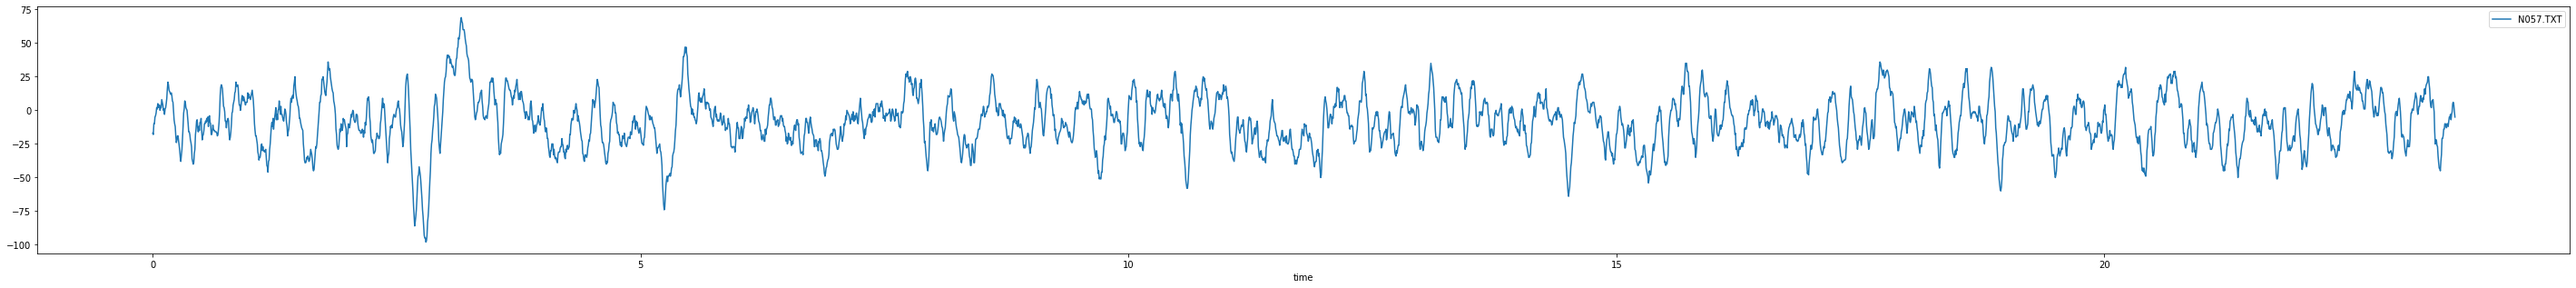

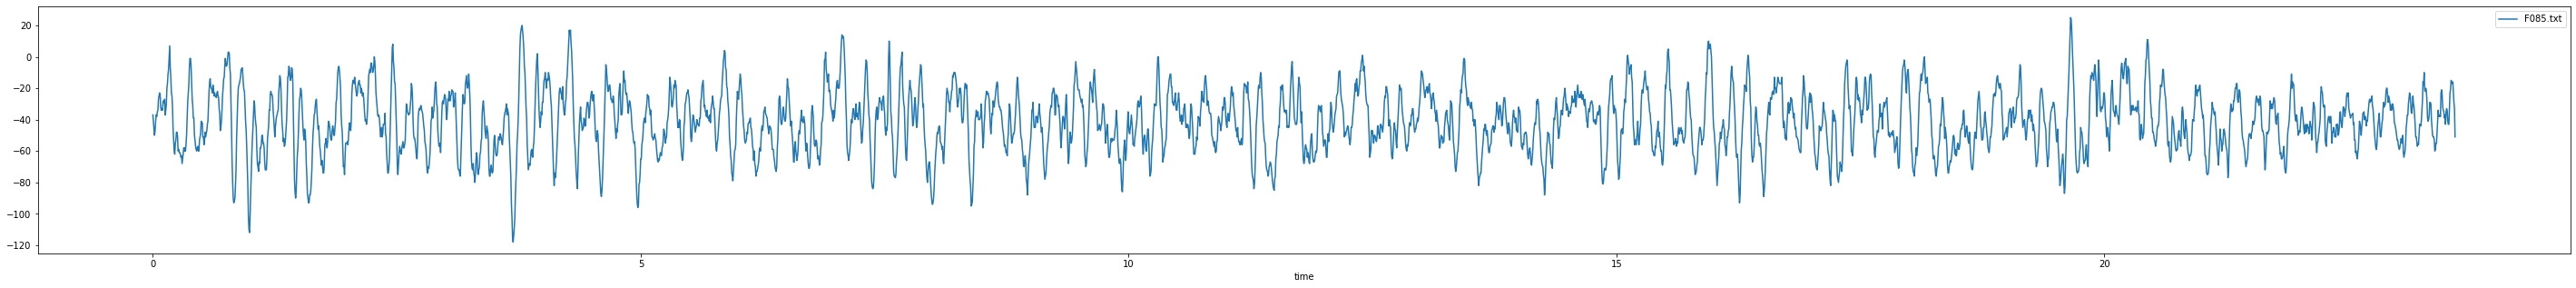

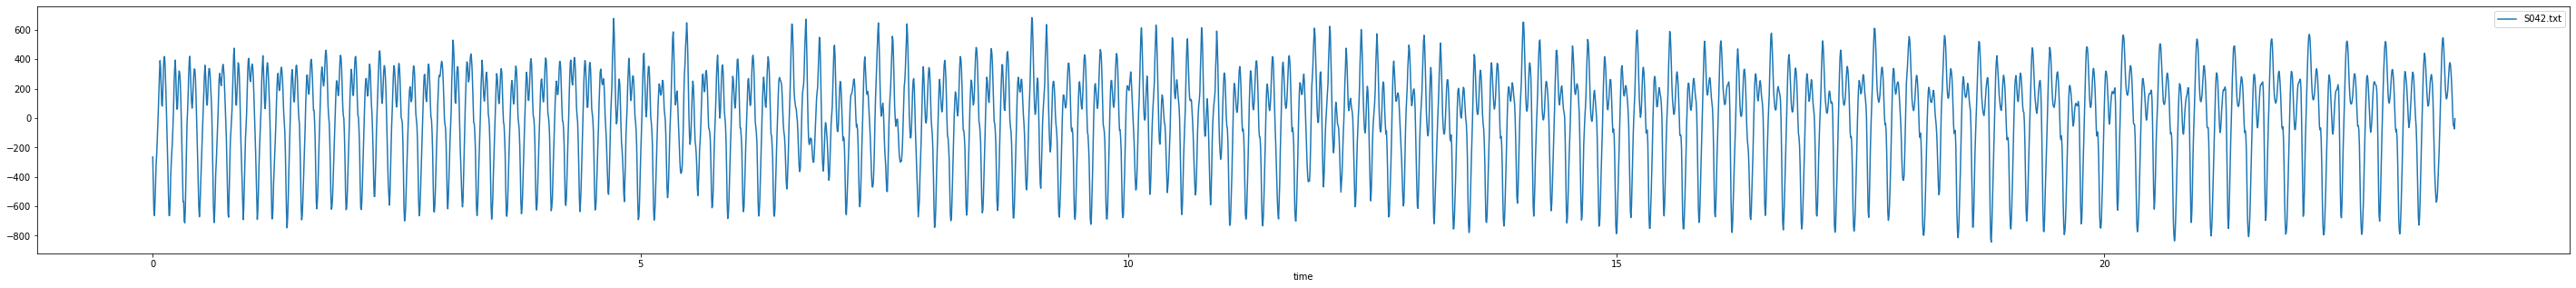

In [6]:
plt.rcParams['figure.figsize'] = [50, 5]
Set_A_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[0]
)[random.randint(0, 99)])
Set_B_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[1]
)[random.randint(0, 99)])
Set_C_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[2]
)[random.randint(0, 99)])
Set_D_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[3]
)[random.randint(0, 99)])
Set_E_DataFrame.plot(x="time", y=os.listdir(path + Sets_Paths[4]
)[random.randint(0, 99)])
plt.show()

#**Criação dos tensors**
Especificações:
500 Sets de 3800 samples cada sendo eles


*   60% para treino (300)
*   20% para teste  (100)
*   20% para validação (100)




In [77]:
def create_array(dataframe, label):
  dataframe = dataframe[:3800]

  numpy_data = dataframe[dataframe.columns[0:100]].to_numpy()
  numpy_data = numpy_data.transpose()
  
  labels = np.full((100, 1), label)

  return numpy_data, labels

def create_train_test_values(data_array, label_array, train_x, test_x, train_y, test_y):
  train_x_temp, test_x_temp, train_y_temp, test_y_temp = train_test_split(data_array, label_array, test_size = 0.2)
  
  train_x = np.concatenate([train_x, train_x_temp])
  test_x = np.concatenate([test_x, test_x_temp])
  train_y = np.concatenate([train_y, train_y_temp])
  test_y = np.concatenate([test_y, test_y_temp])

  return train_x, test_x, train_y, test_y




In [81]:
A_Data, A_Labels = create_array(Set_A_DataFrame, 0)
B_Data, B_Labels = create_array(Set_B_DataFrame, 0)
C_Data, C_Labels = create_array(Set_C_DataFrame, 1)
D_Data, D_Labels = create_array(Set_D_DataFrame, 1)
E_Data, E_Labels = create_array(Set_E_DataFrame, 2)


train_x, test_x, train_y, test_y = train_test_split(A_Data, A_Labels, test_size = 0.2)
train_x, test_x, train_y, test_y = create_train_test_values(B_Data, B_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(C_Data, C_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(D_Data, D_Labels, train_x, test_x, train_y, test_y)
train_x, test_x, train_y, test_y = create_train_test_values(E_Data, E_Labels, train_x, test_x, train_y, test_y)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(400, 3800)
(400, 1)
(100, 3800)
(100, 1)
